In [1]:
%pip install kneed # To install only knee-detection algorithm

Note: you may need to restart the kernel to use updated packages.


In [1]:
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from kneed import DataGenerator, KneeLocator #para mostrar o número de grupos ideal do agrupamento
from sklearn.cluster import KMeans #Importando a função Kmeans
from sklearn.preprocessing import StandardScaler #Função utilizada para normalização dos dados
from sklearn.metrics import silhouette_score
import sklearn.metrics as met
from sklearn.preprocessing import MinMaxScaler #Função utilizada para normalização dos dados

In [9]:
import pickle
with open('./creditcard.pkl', 'rb') as f:
  X_treino, X_teste, y_treino, y_teste = pickle.load(f)

In [10]:
# Determinando a Silhouette para número máximo de cluster estimado (Raiz(instâncias/2)
limit = 5
print(limit)
for k in range(2, limit+1):
    model = KMeans(n_clusters=k)
    model.fit(X_treino)
    pred = model.predict(X_treino)
    score = silhouette_score(X_treino, pred, sample_size=50000)
    print('Silhouette Score k = {}: {:<.3f}'.format(k, score))

5
Silhouette Score k = 2: 0.612
Silhouette Score k = 3: 0.369
Silhouette Score k = 4: 0.475
Silhouette Score k = 5: 0.420


In [4]:
#K-means++ é um método de otimização de centroide para ajudar o modelo a convergir mais rapidamente
kmeans = KMeans(n_clusters=2, random_state=0)
#kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
saida_kmeans = kmeans.fit_predict(X_treino)

/home/gabriel/Documentos/Projetos_git/Exercicios-IA-PUC/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
/home/gabriel/Documentos/Projetos_git/Exercicios-IA-PUC/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


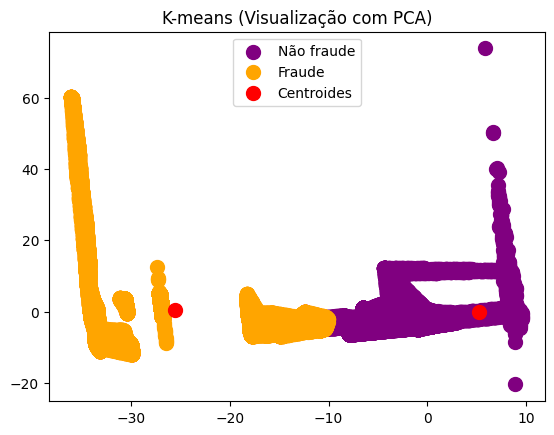

In [ ]:

from sklearn.decomposition import PCA


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_treino)

plt.scatter(X_pca[saida_kmeans == 0, 0], X_pca[saida_kmeans == 0, 1], s=100, c='purple', label='Não fraude')
plt.scatter(X_pca[saida_kmeans == 1, 0], X_pca[saida_kmeans == 1, 1], s=100, c='orange', label='Fraude')

centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=100, c='red', label='Centroides')

plt.title('K-means (Visualização com PCA)')
plt.legend()
plt.show()

In [8]:
ari = met.adjusted_rand_score(y_treino.values.ravel(), saida_kmeans)
print(ari)

0.11367444551118866
